In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('http://dados.ufrn.br/dataset/8bf1a468-48ff-4f4d-95ee-b17b7a3a5592/resource/ff0a457e-76fa-4aca-ad99-48aebd7db070/download/docentes.csv', sep=';')

In [3]:
df.head()

,siape,nome,sexo,formacao,tipo_jornada_trabalho,vinculo,categoria,classe_funcional,id_unidade_lotacao,lotacao,admissao
0,349938,GILDETE AZEVEDO,F,DESCONHECIDA,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE 1 E 2 GRAUS,C ...,1452,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,1984/08/27 00:00:00.000000000
1,1543339,ADELE GUIMARAES UBARANA SANTOS,F,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,1452,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,2006/07/24 00:00:00.000000000
2,1554468,AFRANIO CESAR DE ARAUJO,M,DOUTORADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIV ...,351,ESCOLA AGRÍCOLA DE JUNDIAÍ,2008/09/12 00:00:00.000000000
3,1177821,AIRTON FERNANDES GUIMARAES FILHO,M,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,284,ESCOLA DE MÚSICA,1998/04/28 00:00:00.000000000
4,2360824,ALDAIR RODRIGUES DA SILVA,M,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,351,ESCOLA AGRÍCOLA DE JUNDIAÍ,2017/01/25 00:00:00.000000000


In [4]:
df.drop('nome', axis=1, inplace=True) # remove e atualiza o df

In [5]:
df.describe(include='object')


,sexo,formacao,tipo_jornada_trabalho,vinculo,categoria,classe_funcional,lotacao,admissao
count,2396,2396,2396,2396,2396,2396,2396,2396
unique,3,5,3,1,3,13,107,1151
top,M,DOUTORADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe D - Associado ...,ESCOLA AGRÍCOLA DE JUNDIAÍ,2009/01/27 00:00:00.000000000
freq,1332,1998,2110,2396,2187,822,105,84


In [6]:
df.sexo.unique() #equivalente ao distinct no mongodb

array(['F', 'M', 'false'], dtype=object)

In [18]:
print(df['sexo'].where(df['sexo'] == 'false').count()) # duas formas de localizar
print(df[df['sexo']=='false'].value_counts())

1
siape    sexo   formacao   tipo_jornada_trabalho           vinculo           categoria                         classe_funcional                                                                                      id_unidade_lotacao  lotacao                           admissao                     
6347893  false  DOUTORADO  20 horas semanais               Ativo Permanente  PROFESSOR DO MAGISTERIO SUPERIOR  Classe D - Associado                                                                                  52                  DEPARTAMENTO DE ENGENHARIA CIVIL  1983/05/24 00:00:00.000000000    1
dtype: int64


In [8]:
df2 = df.groupby('sexo')
g = df2.ngroups
g

3

1063
1332


<BarContainer object of 2 artists>

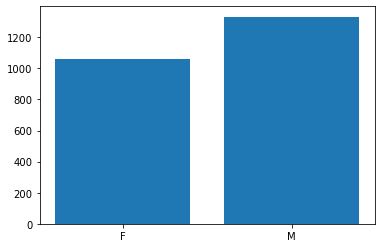

In [9]:
fc = df2.get_group('F').count() #acessa pelo rótulo da coluna
mc = df2.get_group('M').count()
print(fc[0])
print(mc[0])
import matplotlib.pyplot as plt
plt.bar(['F', 'M'], [fc[0], mc[0]])

Gender balance professores@UFRN:

In [10]:
fgb = fc[0]/(fc[0]+mc[0])*100
mgb = mc[0]/(fc[0]+mc[0])*100
print('F: ' + str(fgb) + ' %')
print('M: ' + str(mgb) + ' %')

F: 44.38413361169103 %
M: 55.61586638830897 %


In [11]:
df3 = df.groupby('lotacao')
df3.ngroups

107

In [21]:
df3.get_group('ESCOLA AGRÍCOLA DE JUNDIAÍ').count()

siape                    105
sexo                     105
formacao                 105
tipo_jornada_trabalho    105
vinculo                  105
categoria                105
classe_funcional         105
id_unidade_lotacao       105
lotacao                  105
admissao                 105
dtype: int64

## 1 - Exiba as colunas lotacao e o valor total de docentes em cada lotacao, ordenados do maior para o menor